# 1. Kütüphanelerin ve Verinin Yüklenmesi

Football players data : https://www.kaggle.com/datasets/maso0dahmed/football-players-data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/football-players-data/fifa_players.csv


In [2]:
df = df_ = pd.read_csv(filepath_or_buffer = "/kaggle/input/football-players-data/fifa_players.csv")
df = df_.copy()

### Overall Rating 75 üstü oyuncuları almamın sebebi 75 altı olan oyuncuların çoğu klüpsüz oyuncular olduğu için değerleri ve maaşları 1 olarak sabitlenmiş olması ve analizi kötü etkilemesi.

In [3]:
df = df[df['overall_rating'] >= 75]

# 2. Kayıp Verilerin Oluşturulması

In [4]:
import random
import numpy as np
import pandas as pd

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              columns_to_modify: list = None,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in specific columns of a DataFrame.
    
    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05
        columns_to_modify (list): List of columns where NaN values should be added. Defaults None (affects all columns).
        seed (random): Random seed for reproducibility. Defaults to 42.
    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # If no specific columns are provided, use all columns
    if columns_to_modify is None:
        columns_to_modify = dataframe.columns.tolist()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN in selected columns
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.choice(columns_to_modify)  # Pick random column from the selected ones

        df_missing.iat[row_idx, df_missing.columns.get_loc(col_idx)] = np.nan
        
    return df_missing

# Sadece 'overall_rating' ve 'age' sütunlarında eksik değer eklemek
df = add_random_missing_values(dataframe=df, 
                                            missing_rate=0.02, 
                                            columns_to_modify=['body_type','height_cm', 'weight_kgs','overall_rating', 'potential', 'value_euro', 'wage_euro', 
                                                               'preferred_foot', 'international_reputation(1-5)', 'weak_foot(1-5)', 
                                                               'skill_moves(1-5)','national_rating', 
                                                                'crossing', 'finishing', 'heading_accuracy',
                                                               'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy', 
                                                               'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility',
                                                               'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 
                                                               'long_shots', 'aggression', 'interceptions', 
                                                               'positioning', 'vision', 'penalties', 'composure', 'marking', 'standing_tackle', 'sliding_tackle'])


# 3. Veri Ön İşleme (Data Preprocessing)

## **Veri Yapısı**

### **info() fonksiyonunu kullanarak verimizin 51 sütundan ve 2032 satırdan oluştuğunu görüyoruz. Buradan yapacağımız analiz için gereksiz olan forma numarası gibi bazı sütunları silebiliriz.**

## **Veri Tipleri**
### **Veri tiplerinin çoğunlukla float64 olmasının ana nedeni, özelliklerin çoğunun reyting değerleri veya nicel ölçümler olmasıdır. Body_type, positions gibi sütunlar object gözükmesine rağmen aslında kategorik veridirler bunları direkt olarak kategorik haline çevirebilirsek daha az yer kaplayabilir ve daha anlaşılır olabilirler.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2032 entries, 0 to 17944
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           2032 non-null   object 
 1   full_name                      2032 non-null   object 
 2   birth_date                     2032 non-null   object 
 3   age                            2032 non-null   int64  
 4   height_cm                      1995 non-null   float64
 5   weight_kgs                     1991 non-null   float64
 6   positions                      2032 non-null   object 
 7   nationality                    2032 non-null   object 
 8   overall_rating                 1977 non-null   float64
 9   potential                      1981 non-null   float64
 10  value_euro                     1956 non-null   float64
 11  wage_euro                      1961 non-null   float64
 12  preferred_foot                 1985 non-null   objec

### **Bütün sütunlarda kayıp veriler mevcut fakat national_team, national_rating gibi bazı sütunlarda eksik daha fazla bunun asıl sebebi daha önce milli takımda oynamamış oyuncaların verilerinin olmaması.**

In [6]:
print(df.isnull().sum())

print("Toplam null değerler:", df.isnull().sum().sum())

name                                0
full_name                           0
birth_date                          0
age                                 0
height_cm                          37
weight_kgs                         41
positions                           0
nationality                         0
overall_rating                     55
potential                          51
value_euro                         76
wage_euro                          71
preferred_foot                     47
international_reputation(1-5)      57
weak_foot(1-5)                     55
skill_moves(1-5)                   41
body_type                          34
release_clause_euro               193
national_team                    1553
national_rating                  1561
national_team_position           1553
national_jersey_number           1553
crossing                           37
finishing                          45
heading_accuracy                   46
short_passing                      63
volleys     

### **Aşağıda yaptığımız işlem yapacağımız analiz için gereksiz olan sütunların çıkarılmasıdır. Böylelikle gereksiz kalabalığı engellemiş olacağız.**

In [7]:
columns_to_drop=["national_jersey_number","release_clause_euro","full_name"]
df = df.drop(columns=columns_to_drop)

### Öncelikle kategorik olması gereken sütunlarımızı kategorik hale getiriyoruz.

In [8]:
categorical_columns = ['positions', 'nationality', 'preferred_foot', 'body_type', 'national_team', 'national_team_position']

for col in categorical_columns:
    df[col] = df[col].astype('category')    

#### Doldurma işlemlerinde hata verdi bu yüzden positions sütununa bir göz atmak istedim. 890 tane unique değer olduğunu gördüm bunun sebebi bir oyuncunun birden fazla pozisyonda oynayabiliyor olması ben ise sadece ana pozisyonunu görmek istiyorum. Bunun için virgülden sonrasını sileceğim. 

In [9]:
df['positions'].nunique()

307

In [10]:
df['positions'] = df['positions'].str.split(',').str[0]

#### Görüldüğü üzere 890 adetten 15 ana pozisyona indirdik.

In [11]:
df['positions'].nunique()

15

## Kayıp Verilerin Doldurulması

### Bu aşamada kayıp verilerimizi pozisyona göre groupby yaparak ve kategorik olan preferred_foot gibi bazı sütunları mod ile kategorik olmayan sayısal değerleri ve hem kategorik hem ordinal olan skill_moves gibi ise medyan kullanarak dolduracağız.

In [12]:
for column in ['height_cm', 'weight_kgs', 'overall_rating', 'potential', 
               'value_euro', 'wage_euro', 'crossing', 'finishing', 'heading_accuracy', 
               'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy', 
               'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 
               'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 
               'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 
               'penalties', 'composure', 'marking', 'standing_tackle', 'sliding_tackle','international_reputation(1-5)',
               'weak_foot(1-5)', 'skill_moves(1-5)']:
    
    # Pozisyonlara göre gruplandırarak medyan ile doldurma işlemi
    df[column] = df.groupby('positions')[column].transform(lambda x: x.fillna(x.median()))

In [13]:
for column in ['preferred_foot', 'nationality','body_type','national_team_position']:
    
        # Pozisyonlara göre gruplandırarak mod ile doldurma işlemi
    df[column] = df.groupby('positions')[column].transform(lambda x: x.fillna(x.mode()[0]))

### Görüldüğü üzere kayıp verilerimizi gerektiği gibi doldurduk.

In [14]:
print(df.isnull().sum())

print("Toplam null değerler:", df.isnull().sum().sum())

name                                0
birth_date                          0
age                                 0
height_cm                           0
weight_kgs                          0
positions                           0
nationality                         0
overall_rating                      0
potential                           0
value_euro                          0
wage_euro                           0
preferred_foot                      0
international_reputation(1-5)       0
weak_foot(1-5)                      0
skill_moves(1-5)                    0
body_type                           0
national_team                    1553
national_rating                  1561
national_team_position              0
crossing                            0
finishing                           0
heading_accuracy                    0
short_passing                       0
volleys                             0
dribbling                           0
curve                               0
freekick_acc

# 4. EDA

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2032.0,2.771555e+01,3.933444e+00,18.0,25.00,28.00,3.100000e+01,4.100000e+01
height_cm,2032.0,1.759563e+02,1.392885e+01,152.4,167.64,182.88,1.879600e+02,2.006600e+02
weight_kgs,2032.0,7.687687e+01,7.180324e+00,55.8,72.10,77.10,8.210000e+01,1.030000e+02
overall_rating,2032.0,7.807923e+01,3.248318e+00,75.0,76.00,77.00,8.000000e+01,9.400000e+01
potential,2032.0,8.026181e+01,4.108734e+00,75.0,77.00,80.00,8.300000e+01,9.500000e+01
value_euro,2032.0,1.298867e+07,1.163366e+07,450000.0,7000000.00,9500000.00,1.400000e+07,1.105000e+08
wage_euro,2032.0,4.538853e+04,4.826149e+04,1000.0,20000.00,31000.00,5.200000e+04,5.650000e+05
international_reputation(1-5),2032.0,1.743848e+00,8.021767e-01,1.0,1.00,2.00,2.000000e+00,5.000000e+00
weak_foot(1-5),2032.0,3.201280e+00,7.123710e-01,1.0,3.00,3.00,4.000000e+00,5.000000e+00
skill_moves(1-5),2032.0,2.923720e+00,9.629208e-01,1.0,2.00,3.00,4.000000e+00,5.000000e+00


### Pozisyonlara baktığımızda en çok Stoper sonrasında santrafor ve ortasaha geliyor.

In [16]:
df['positions'].value_counts()

positions
CB     353
ST     286
CM     265
CDM    197
GK     191
CAM    158
RB     112
RM     110
LB     108
LM     103
LW      56
RW      47
CF      23
LWB     12
RWB     11
Name: count, dtype: int64

In [17]:
df.head()

,name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,6/24/1987,31,170.18,72.1,CF,Argentina,94.0,94.0,110500000.0,...,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0
1,C. Eriksen,2/14/1992,27,154.94,76.2,CAM,Denmark,88.0,89.0,69500000.0,...,89.0,46.0,56.0,84.0,91.0,67.0,88.0,59.0,57.0,22.0
2,P. Pogba,3/15/1993,25,190.50,83.9,CM,France,88.0,91.0,73000000.0,...,82.0,78.0,64.0,82.0,88.0,82.0,87.0,63.0,67.0,67.0
3,L. Insigne,6/4/1991,27,162.56,59.0,LW,Italy,88.0,88.0,62000000.0,...,84.0,34.0,35.0,83.0,87.0,61.0,83.0,51.0,36.0,22.0
4,K. Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88.0,91.0,60000000.0,...,15.0,87.0,88.0,24.0,49.0,33.0,80.0,91.0,88.0,87.0


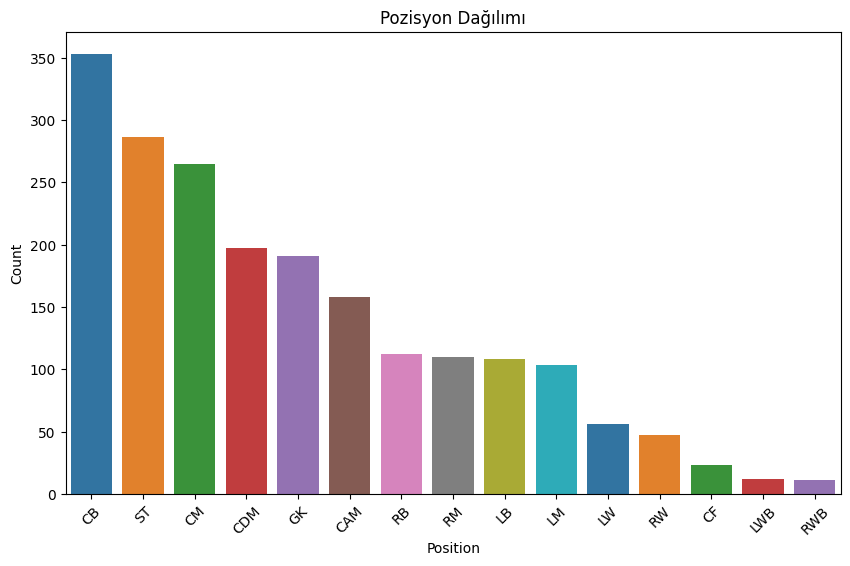

In [18]:
positions_counts = df['positions'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=positions_counts.index, y=positions_counts.values, palette='tab10')
plt.title('Pozisyon Dağılımı')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [19]:
 features=['height_cm', 'weight_kgs', 'overall_rating', 'potential', 
               'value_euro', 'wage_euro', 'crossing', 'finishing', 'heading_accuracy', 
               'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy', 
               'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 
               'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 
               'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 
               'penalties', 'composure', 'marking', 'standing_tackle', 'sliding_tackle','international_reputation(1-5)',
               'weak_foot(1-5)', 'skill_moves(1-5)']

### Bu fonksiyon oyuncu değeri gibi büyük sayıda olan verilerin grafiklerde daha iyi anlaşılmasını sağlıyacak.

In [20]:
def shorten_number(x, pos):
    if x >= 1_000_000_000:
        return f'{x / 1_000_000_000:.2f}B'  # Milyar
    elif x >= 1_000_000:
        return f'{x / 1_000_000:.2f}M'  # Milyon
    elif x >= 1_000:
        return f'{x / 1_000:.2f}K'  # Bin
    else:
        return str(x)

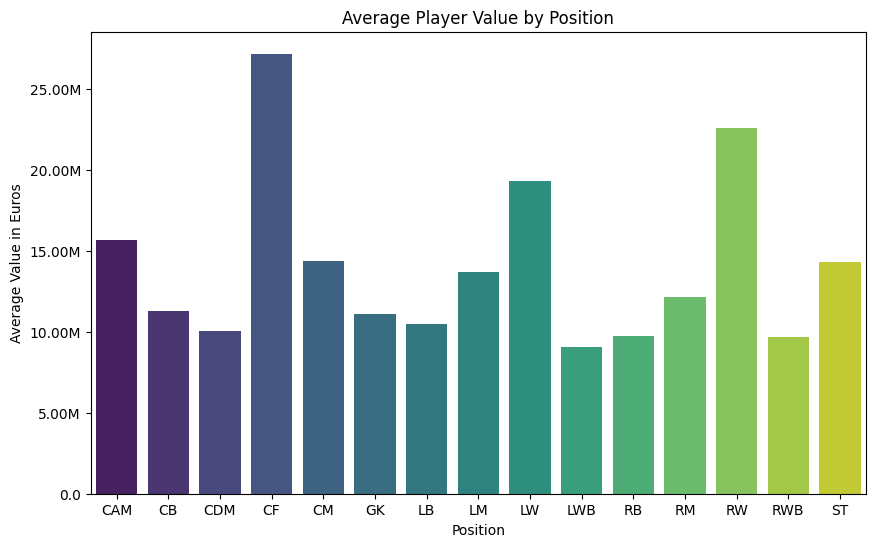

In [21]:
position_avg_value = df.groupby('positions')['value_euro'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='positions', y='value_euro', data=position_avg_value, palette="viridis")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(shorten_number))
plt.title('Average Player Value by Position')
plt.xlabel('Position')
plt.ylabel('Average Value in Euros')
plt.show()

### Yukarıdaki grafikten gördüğümüze göre ortalama değeri en çok olan pozisyonlar forvet ardından sağ ve sol kanat pozisyonları geliyor.

# 5. Genel Performans ve Değer Analizi

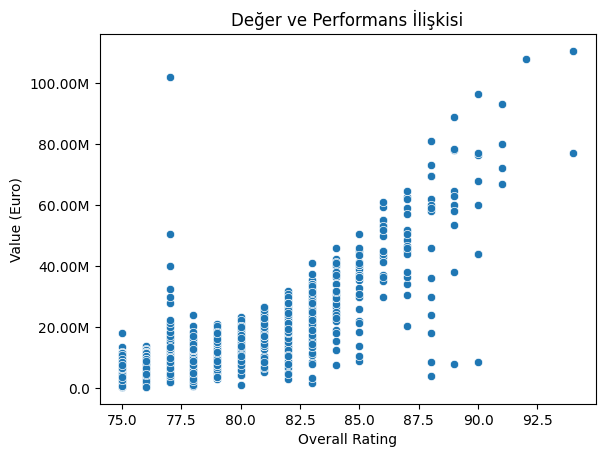

In [22]:
top_players = df.sort_values(by=['overall_rating','potential'], ascending=False).head(10)
value_performance_corr = df[['value_euro', 'overall_rating']].corr().iloc[0, 1]
sns.scatterplot(data=df, x='overall_rating', y='value_euro')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(shorten_number))
plt.title("Değer ve Performans İlişkisi")
plt.xlabel("Overall Rating")
plt.ylabel("Value (Euro)")
plt.show()

In [23]:
print('Değer ile overall_rating arasındaki korelasyon:',value_performance_corr)

Değer ile overall_rating arasındaki korelasyon: 0.812022604205141


### Lionel Messi, Cristiano Ronaldo ve Neymar Jr. 94-92 arasında overall_rating ve potential ile en üst sırada olduklarını görüyoruz ve bu iki değer arasında 0.81 seviyesinde pozitif bir korelasyon var.

In [24]:
top_players[['name', 'overall_rating', 'potential','value_euro','age']]

,name,overall_rating,potential,value_euro,age
0,L. Messi,94.0,94.0,110500000.0,31
17944,Cristiano Ronaldo,94.0,94.0,77000000.0,34
17943,Neymar Jr,92.0,92.0,108000000.0,27
17942,De Gea,91.0,93.0,72000000.0,28
17938,L. Suárez,91.0,91.0,80000000.0,32
17939,L. Modrić,91.0,91.0,67000000.0,33
17940,E. Hazard,91.0,91.0,93000000.0,28
17936,J. Oblak,90.0,93.0,68000000.0,26
17937,H. Kane,90.0,92.0,96500000.0,25
17930,G. Chiellini,90.0,90.0,8500000.0,34


# 6. Korelasyon Analizi


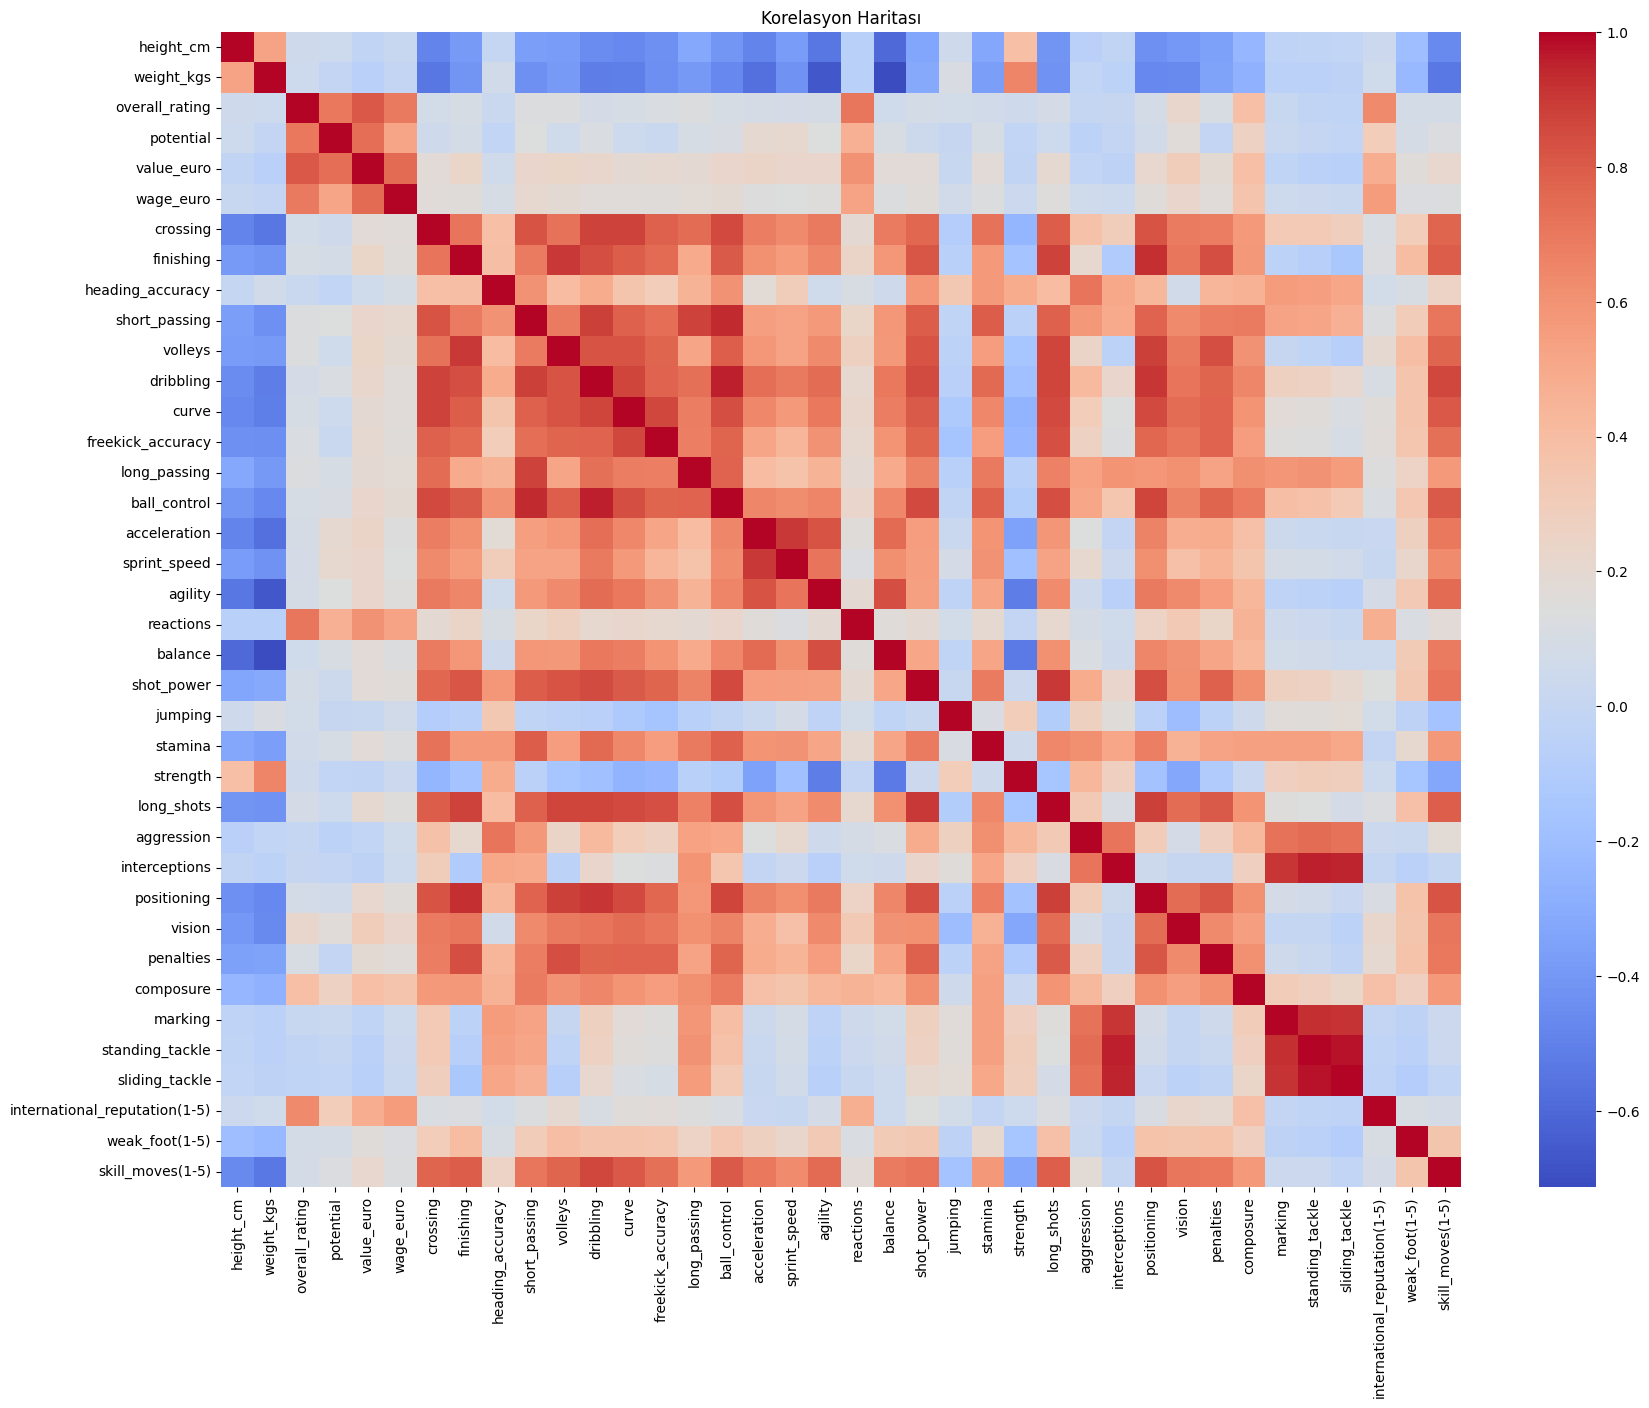

In [25]:
correlation_matrix = df[features].corr()
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix,annot=False,cmap="coolwarm",cbar=True)
plt.title("Korelasyon Haritası")
plt.show()

### Çok fazla özellik olduğu için anlaşılması zor bir harita oldu. Bunun için pozisyon özelliklerine göre ayırarak bakacağız pozisyondan bağımsız olan özelliklerede ayrı bir şekilde bakacağız.

In [26]:
def_fea = ['marking', 'standing_tackle', 'sliding_tackle', 'interceptions', 'aggression', 'strength', 'jumping','height_cm', 'weight_kgs']
mid_fea = ['short_passing', 'dribbling', 'ball_control', 'vision', 'composure', 'agility', 'reactions','height_cm', 'weight_kgs','weak_foot(1-5)', 'skill_moves(1-5)']
atk_fea = ['finishing', 'positioning', 'shot_power', 'heading_accuracy', 'volleys', 'penalties','strength', 'jumping','dribbling','height_cm', 'weight_kgs','weak_foot(1-5)', 'skill_moves(1-5)']
physical_performance = ['height_cm', 'weight_kgs', 'overall_rating', 'potential','age']

### Şimdi her bir grup için korelasyon matrisini hesaplayıp ısı haritamızı oluşturalım

In [27]:
defensive_corr = df[def_fea].corr()
mid_corr = df[mid_fea].corr()
atk_corr = df[atk_fea].corr()
phy_corr = df[physical_performance].corr()

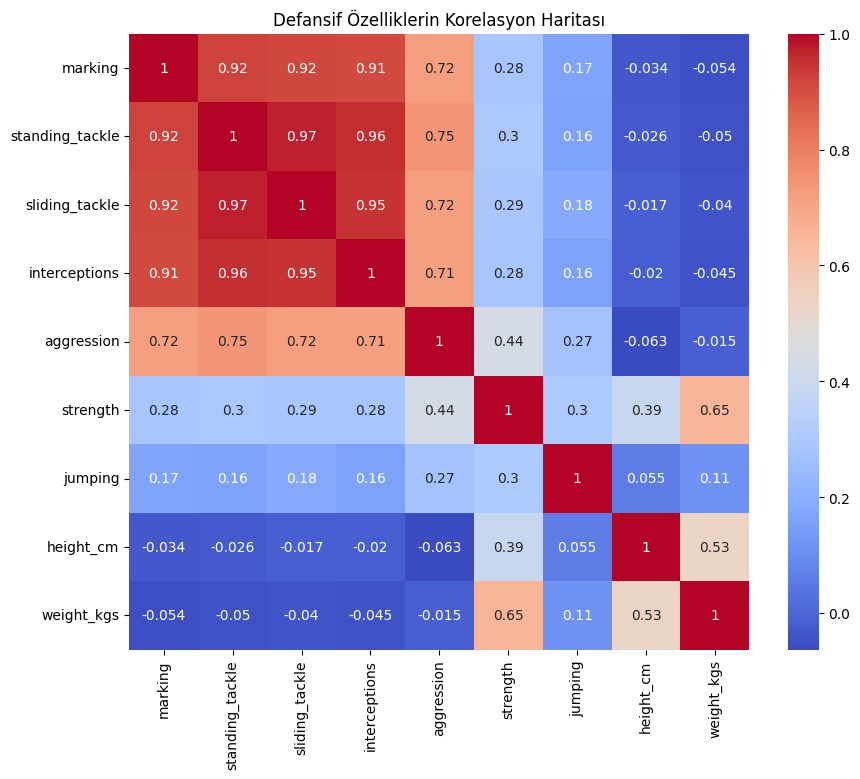

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(defensive_corr,annot=True,cmap="coolwarm",cbar=True)
plt.title("Defansif Özelliklerin Korelasyon Haritası")
plt.show()

### Gördüğümüz haritaya göre marking'in standin_tackle,siliding_tackle ve interceptions ile güçlü pozitif ilişkisi olduğu ve agression ile pozitif ilişkisi olduğunu görüyoruz aslında bu dört özellik kendi aralarında güçlü pozitif ilişkiye sahip. Kilo ve güç arasında'da pozitif bir ilişki olduğunu söyleyebiliriz.

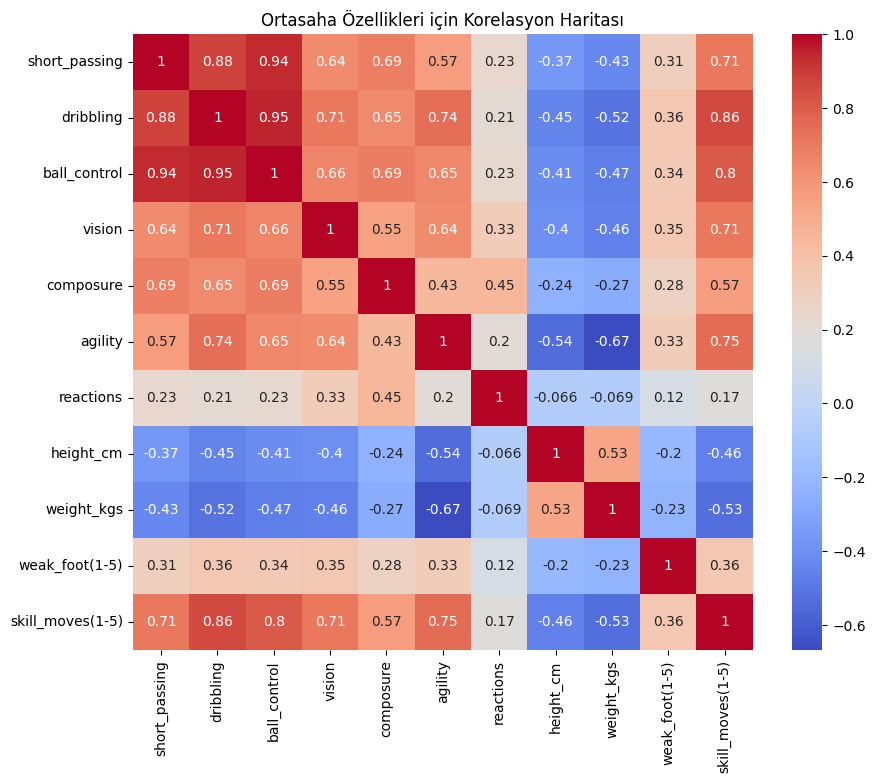

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(mid_corr,annot=True,cmap="coolwarm",cbar=True)
plt.title("Ortasaha Özellikleri için Korelasyon Haritası")
plt.show()

### Buradada yine kendi aralarında güçlü ilişkiler olan özellikler görüyoruz. Short_passing, dribbling ve ball_control kendi aralarında güçlü pozitif ilişki olduğunu görebiliriz. Aynı zamanda bu üç özelliğin vision, composure ve agility arasındada pozitif bir ilişki var. Skill_moves özelliğinin ise dribbling ile arasında güçlü bir ilişki varken ball_control, vşsşon, agility gibi özelliklerlede arasında pozitif ilişki var.

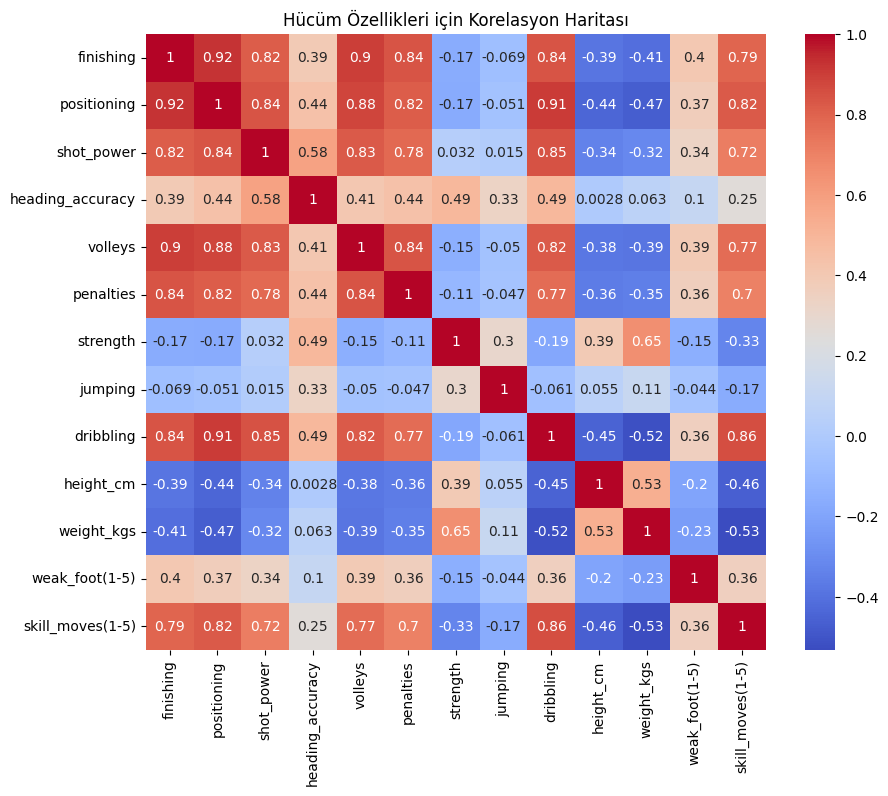

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(atk_corr,annot=True,cmap="coolwarm",cbar=True)
plt.title("Hücüm Özellikleri için Korelasyon Haritası")
plt.show()

### Burada ise finishing özelliğinin positioning, volleys ve dribbling arasında arasında güçlü, shot_power, penalties ve skill_moves ile ise pozitif ilişkide olduğunu görebiliriz. Yine bu özellikler kendi aralarında ilişkiye sahip. 

## Fiziksel Özelliklerin Performansa Etkisi

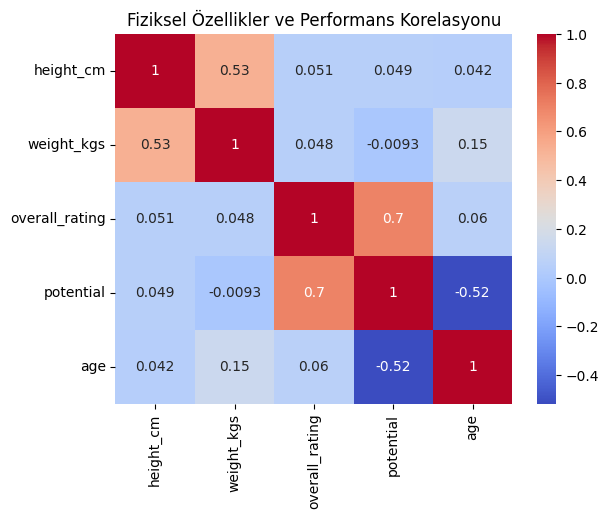

In [31]:
sns.heatmap(phy_corr, annot=True, cmap='coolwarm')
plt.title("Fiziksel Özellikler ve Performans Korelasyonu")
plt.show()

### Görüldüğü üzere fiziksel özelliklerin overall_rating ve potential'e herhangi bir etkisi yok.

# 7. Yaş ve Potansiyel Analizi

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


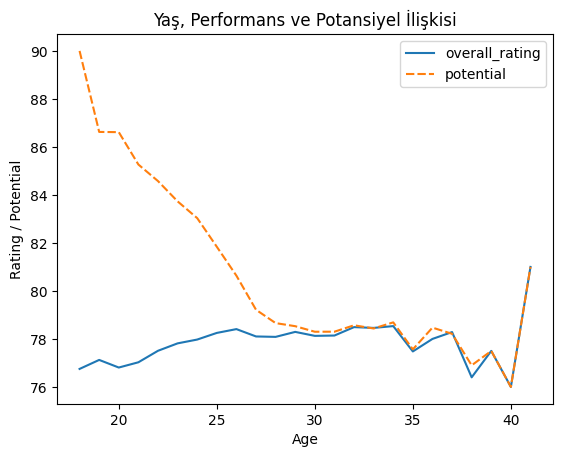

In [32]:
wonder_kid = df[(df['age']< 21) & (df['potential']>85)].sort_values(by='potential', ascending=False)
age_rating_potential = df.groupby('age')[['overall_rating','potential']].mean()
sns.lineplot(data=age_rating_potential)
plt.title("Yaş, Performans ve Potansiyel İlişkisi")
plt.xlabel("Age")
plt.ylabel("Rating / Potential")
plt.show()

### Yaş ilerledikçe overall_rating artış gösteriyor, ancak doğal olarak potansiyel genellikle genç yaşlarda yüksek seviyede.

In [33]:
wonder_kid[['name','age','overall_rating','potential','positions']].head(10)

,name,age,overall_rating,potential,positions
6,K. Mbappé,20,88.0,95.0,RW
17837,G. Donnarumma,20,83.0,94.0,GK
17839,M. de Ligt,19,83.0,92.0,CB
191,Vinícius Júnior,18,78.0,92.0,LW
17555,J. Sancho,18,79.0,91.0,RM
500,P. Foden,18,75.0,90.0,CAM
17715,K. Havertz,19,81.0,90.0,CAM
122,H. Aouar,20,80.0,90.0,CM
17423,A. Lafont,20,78.0,90.0,GK
341,João Félix,19,76.0,89.0,CF


### Yukarıda en dikkat çekici on ismi görebiliriz. Eğer istersek henüz kendinin gösterememiş ama potansiyeli yüksek oyuncularıda bulabiliriz.